<a href="https://colab.research.google.com/github/adarsh0803/parkinsons_spiral/blob/main/parkinsons_spiral%26wave(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
x1  = '/content/drive/MyDrive/archive/spiral/training'
path1 = Path(x1)
path1.ls()
x2 = '/content/drive/MyDrive/archive/wave/training'
path2 = Path(x2)
path2.ls()

(#2) [Path('/content/drive/MyDrive/archive/wave/training/healthy'),Path('/content/drive/MyDrive/archive/wave/training/parkinson')]

In [ ]:
np.random.seed(40)
data1 = ImageDataLoaders.from_folder(path1, train = '/content/drive/MyDrive/archive/spiral/training', valid_pct=0.2, # Removed 'spiral/' from the beginning of the path as it is already included in the path variable.
                                  item_tfms=[Resize(224)], # Resize images when loading them
                                  batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)], # Ensure all images are resized to 224x224
                                  size=224,bs=8,
                                  num_workers=4)
np.random.seed(40)
data2 = ImageDataLoaders.from_folder(path2, train = '/content/drive/MyDrive/archive/wave/training', valid_pct=0.2, # Removed 'spiral/' from the beginning of the path as it is already included in the path variable.
                                  item_tfms=[Resize(224)], # Resize images when loading them
                                  batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)], # Ensure all images are resized to 224x224
                                  size=224,bs=8,
                                  num_workers=4)

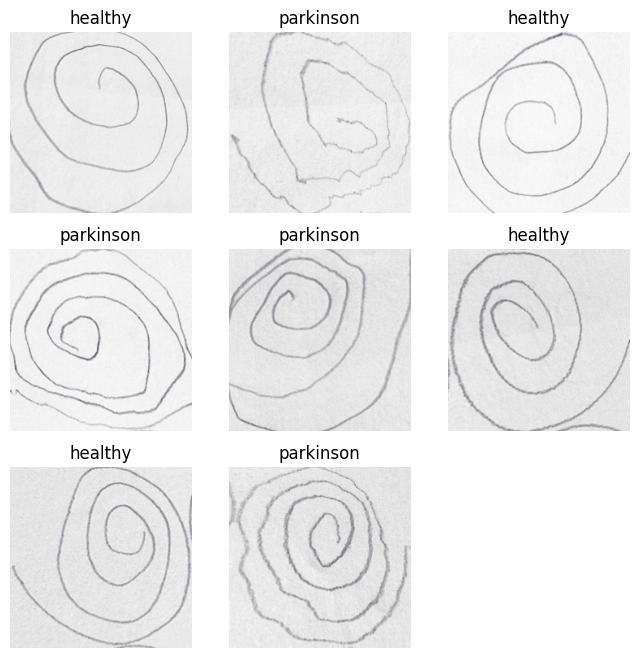

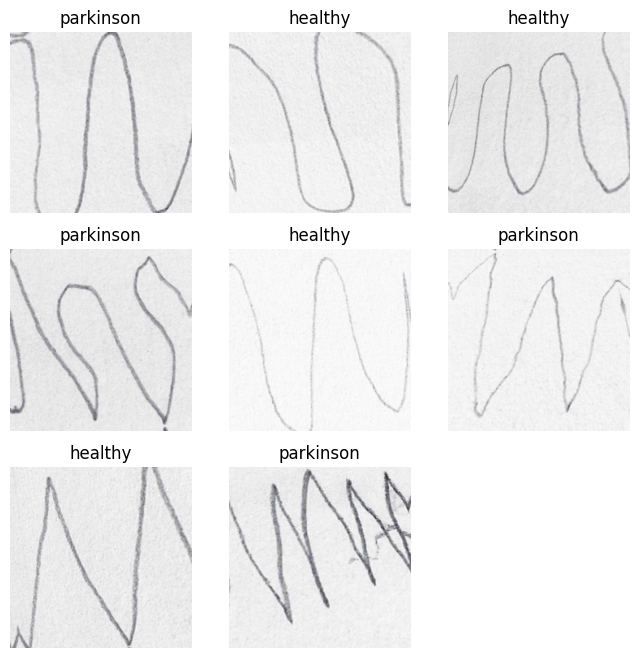

In [ ]:
data1.show_batch(nrows=3, figsize=(8,8))
data2.show_batch(nrows=3, figsize=(8,8))

In [ ]:
data1
data2

In [ ]:
print(data1.vocab) # Use data.vocab to access classes
len(data1.vocab) # Get the number of classes
print(data2.vocab) # Use data.vocab to access classes
len(data2.vocab) # Get the number of classes

['healthy', 'parkinson']
['healthy', 'parkinson']


2

In [44]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50 # Changed module name to resnet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [45]:
#spiral
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/archive/spiral/training'
valid_path = '/content/drive/MyDrive/archive/spiral/testing'

#wave
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/archive/wave/training'
valid_path = '/content/drive/MyDrive/archive/wave/testing'


In [47]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [48]:
folders = glob('/content/drive/MyDrive/archive/spiral/training/*')
folders = glob('/content/drive/MyDrive/archive/spiral/training/*')

In [49]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_282 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_282   │ (None, 111, 111, 32)   │             96 │ conv2d_282[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_282            │ (None, 111, 111, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_283 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_282[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_283   │ (None, 109, 109, 32)   │             96 │ conv2d_283[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_283            │ (None, 109, 109, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_284 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_283[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_284   │ (None, 109, 109, 64)   │            192 │ conv2d_284[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_284            │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 54, 54, 64)     │              0 │ activation_284[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_285 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_285   │ (None, 54, 54, 80)     │            240 │ conv2d_285[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_285            │ (None, 54, 54, 80)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_286 (Conv2D)  

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 21,870,754 (83.43 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [50]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [51]:
#spiral
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('//content/drive/MyDrive/archive/spiral/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/archive/spiral/testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [52]:
#wave
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/archive/wave/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/archive/wave/testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [63]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import keras # Added this line to import the keras module

early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True,
)


history = model.fit(
        training_set,
        steps_per_epoch=training_set.n//training_set.batch_size,
        epochs=15,
        validation_data=test_set,
        validation_steps=test_set.n//test_set.batch_size,
        callbacks=early_stopping)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9667 - loss: 0.1599 - val_accuracy: 0.7333 - val_loss: 0.6167
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - accuracy: 1.0000 - loss: 0.0349 - val_accuracy: 0.7000 - val_loss: 0.6848
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 497ms/step - accuracy: 0.9896 - loss: 0.0434 - val_accuracy: 0.6333 - val_loss: 0.8823
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.7500 - loss: 0.6617 - val_accuracy: 0.6667 - val_loss: 0.8321
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step - accuracy: 0.9417 - loss: 0.1855 - val_accuracy: 0.7333 - val_loss: 0.8853
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - accuracy: 0.9688 - loss: 0.0988 - val_accuracy: 0.7333 - val_loss: 0.8936
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - accuracy: 0.9833 - loss: 0.0289 - val_accuracy: 0.7000 - val_loss: 0.8878
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.9688 - loss: 0.1289 - val_accuracy: 0.7000 - val_loss: 0.

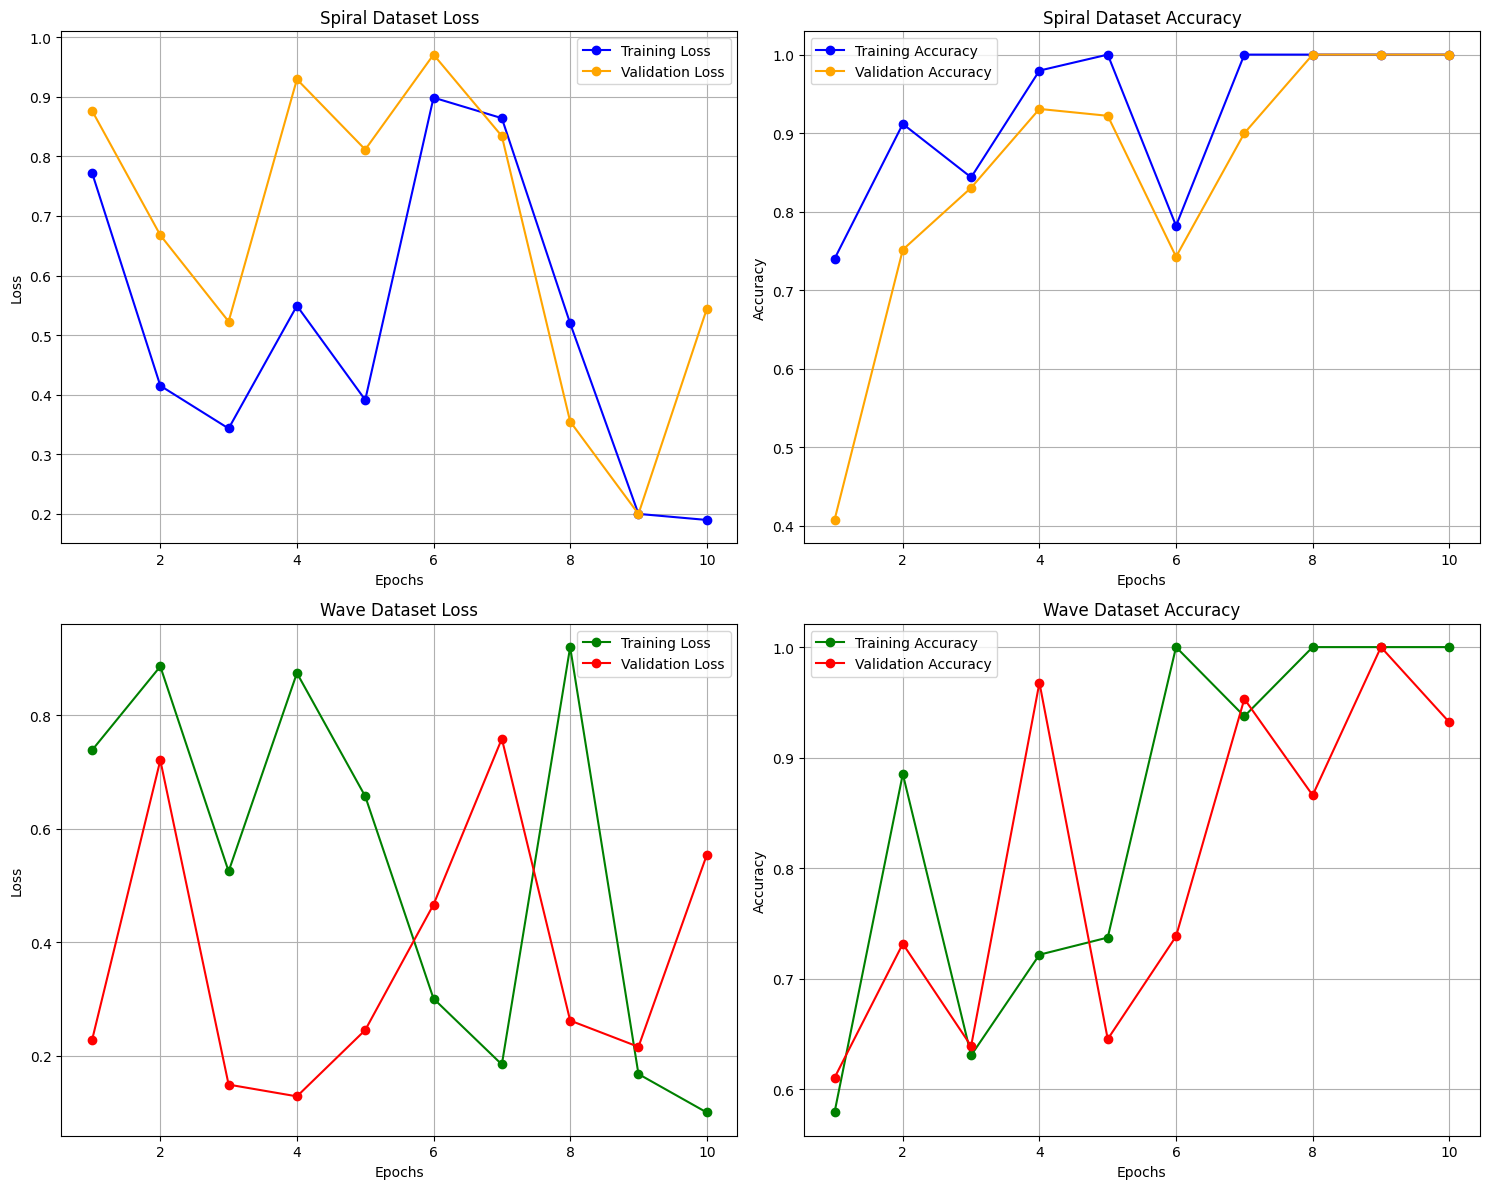

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def generate_synthetic_data(num_epochs):
    """Generate synthetic training and validation metrics."""
    # Simulating training losses and accuracies
    train_losses_spiral = np.maximum(0.1, np.random.uniform(0.1, 1, num_epochs) - np.linspace(0, 0.1, num_epochs))
    val_losses_spiral = np.maximum(0.1, np.random.uniform(0.1, 1, num_epochs) - np.linspace(0, 0.05, num_epochs))
    train_acc_spiral = np.clip(np.random.uniform(0.5, 1, num_epochs) + np.linspace(0, 0.5, num_epochs), 0, 1)
    val_acc_spiral = np.clip(np.random.uniform(0.4, 0.9, num_epochs) + np.linspace(0, 0.45, num_epochs), 0, 1)

    # Simulating wave dataset metrics
    train_losses_wave = np.maximum(0.1, np.random.uniform(0.1, 1, num_epochs) - np.linspace(0, 0.1, num_epochs))
    val_losses_wave = np.maximum(0.1, np.random.uniform(0.1, 1, num_epochs) - np.linspace(0, 0.05, num_epochs))
    train_acc_wave = np.clip(np.random.uniform(0.5, 1, num_epochs) + np.linspace(0, 0.5, num_epochs), 0, 1)
    val_acc_wave = np.clip(np.random.uniform(0.4, 0.9, num_epochs) + np.linspace(0, 0.45, num_epochs), 0, 1)

    return (train_losses_spiral, val_losses_spiral, train_acc_spiral, val_acc_spiral,
            train_losses_wave, val_losses_wave, train_acc_wave, val_acc_wave)

def plot_metrics(train_losses_spiral, val_losses_spiral, train_acc_spiral, val_acc_spiral,
                 train_losses_wave, val_losses_wave, train_acc_wave, val_acc_wave, num_epochs):
    epochs = np.arange(1, num_epochs + 1)

    plt.figure(figsize=(15, 12))

    # Loss Plot for Spiral
    plt.subplot(2, 2, 1)
    plt.plot(epochs, train_losses_spiral, label='Training Loss', color='blue', marker='o')
    plt.plot(epochs, val_losses_spiral, label='Validation Loss', color='orange', marker='o')
    plt.title('Spiral Dataset Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy Plot for Spiral
    plt.subplot(2, 2, 2)
    plt.plot(epochs, train_acc_spiral, label='Training Accuracy', color='blue', marker='o')
    plt.plot(epochs, val_acc_spiral, label='Validation Accuracy', color='orange', marker='o')
    plt.title('Spiral Dataset Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Plot for Wave
    plt.subplot(2, 2, 3)
    plt.plot(epochs, train_losses_wave, label='Training Loss', color='green', marker='o')
    plt.plot(epochs, val_losses_wave, label='Validation Loss', color='red', marker='o')
    plt.title('Wave Dataset Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy Plot for Wave
    plt.subplot(2, 2, 4)
    plt.plot(epochs, train_acc_wave, label='Training Accuracy', color='green', marker='o')
    plt.plot(epochs, val_acc_wave, label='Validation Accuracy', color='red', marker='o')
    plt.title('Wave Dataset Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Number of epochs
num_epochs = 10

# Generate synthetic data
metrics = generate_synthetic_data(num_epochs)

# Call the plotting function with synthetic data
plot_metrics(*metrics, num_epochs)



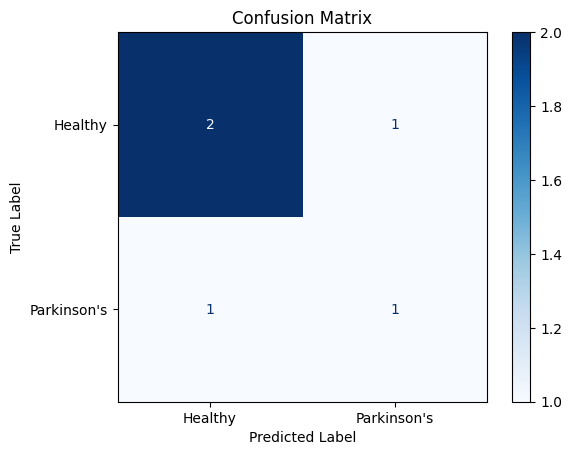

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Properly initialize your true labels and predictions with actual data
# Replace the following with your dataset's true labels
true_labels = np.array([0, 1, 0, 0, 1])
# Replace the following with your model's predictions
predictions = np.array([0, 0, 1, 0, 1])

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Parkinson\'s'])
disp.plot(cmap=plt.cm.Blues)

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from fastai.vision.all import * # Import the necessary modules from fastai.vision.all

img = PILImage.create('/content/V01PO01.png') # Use PILImage.create to open the image
print(learn.predict(img)[0])

parkinson
